In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Transformacion Geométrica de Imágenes


## 1.0 Trasladar

(-0.5, 1595.5, 589.5, -0.5)

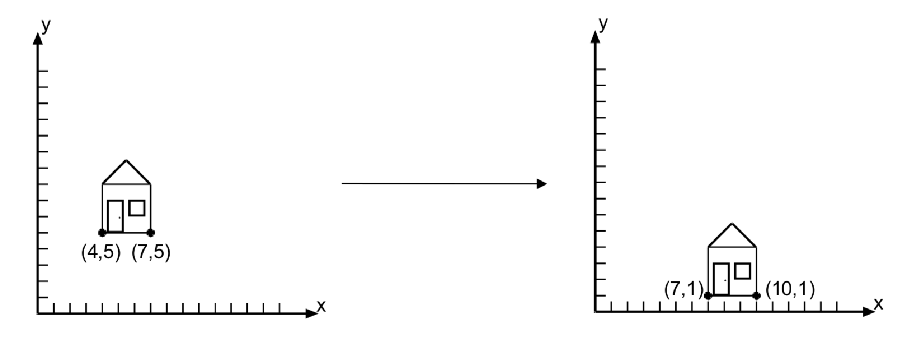

In [2]:
from PIL import Image
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

image = Image.open('data/traslacion.png')

plt.imshow(image)
plt.axis('off')

Se definine una traslación como una transformacion tal que a cada punto $P(x,y)$ de un objeto o figura le corresponder otro 
punto $P'(x',y')$, tal que:

\begin{equation}
\vec{P'} =\vec{P} + \vec{d}
\end{equation}

En dos dimensiones esto se expresa 

\begin{equation}
x' =x+d_x
\end{equation}

\begin{equation}
y' =y+d_y
\end{equation}
     
Esta transformación mantiene la orientación, forma y tamaño de las figuras trasladadas.
     
Usando matrices y vectores homogeneos yo puedo escribir una traslación usando una matriz M:
     
\begin{equation}
M = 
\begin{bmatrix}
1 & 0 & dx \\
0 & 1 & dy \\
0 & 0 & 1 \\
\end{bmatrix}
\end{equation}    
     
De modo que $\vec{P'}$= $M\vec{P}$
                  
\begin{equation}
\vec{P'} = 
\begin{bmatrix}
1 & 0 & dx \\
0 & 1 & dy \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
\end{equation}
     
\begin{equation}
\begin{bmatrix}
x+dx \\
y+dy \\
1\\
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & dx \\
0 & 1 & dy \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
\end{equation}
     
     


Voy a trasladar una imagen 100 pixeles la dirección de $x$ y 50 pixeles en dirección $y$.

342 548


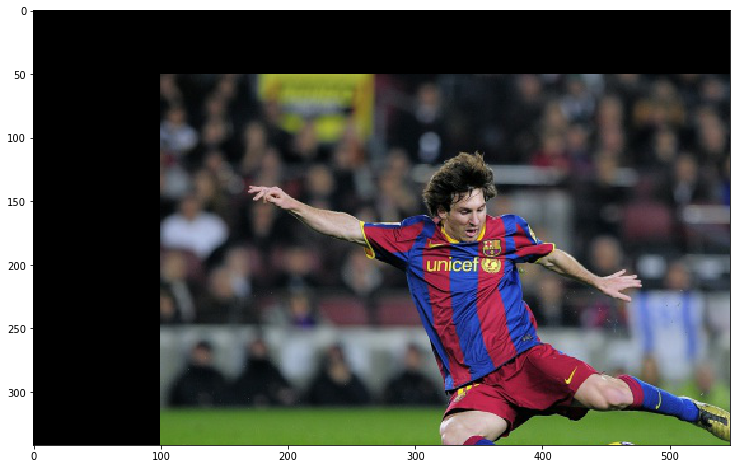

In [3]:
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

img = cv2.imread('data/messi5.jpg')

rows,cols = img.shape[:2]

print(rows,cols)

#Matriz para trasladar

M = np.float32([[1,0,100],[0,1,50]])

img_tr = cv2.warpAffine(img,M,(cols,rows))  #Aplica la matriz para transformar

plt.imshow(cv2.cvtColor(img_tr, cv2.COLOR_BGR2RGB))


## 2.0 Escalar

Vamos a doblar el ancho y el alto de una imagen

Tamaño original: (342, 548, 3)
Tamaño nuevo 1 : (684, 1096, 3)


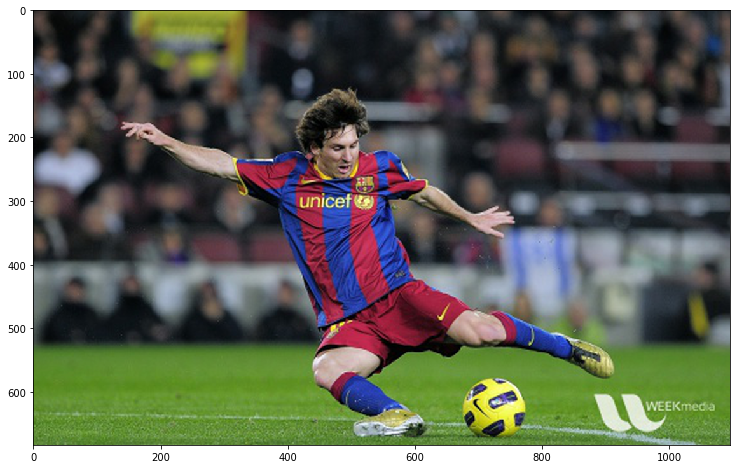

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

img = cv2.imread('data/messi5.jpg')

print("Tamaño original:", img.shape)

#Primera alternativa

img_new_1 = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

print("Tamaño nuevo 1 :", img_new_1.shape)

plt.imshow(cv2.cvtColor(img_new_1, cv2.COLOR_BGR2RGB))

#OpenCV usa un modelo BGR para leer las imagenes, por lo que si las abrimos con OpenCv y las desplegamos
#con otra herramienta que use un modelo de color RGB como matplotlibe, veremos que el rojo sera azul y el azul sera
#rojo. Por esto es que antes de desplegarlas con matplotlib usamos cv2.COLOR_BGR2RGB para cambiar el modelo de color.


Filas: 342 

Columnas: 548 

Tamaño nuevo 2: (684, 1096, 3)


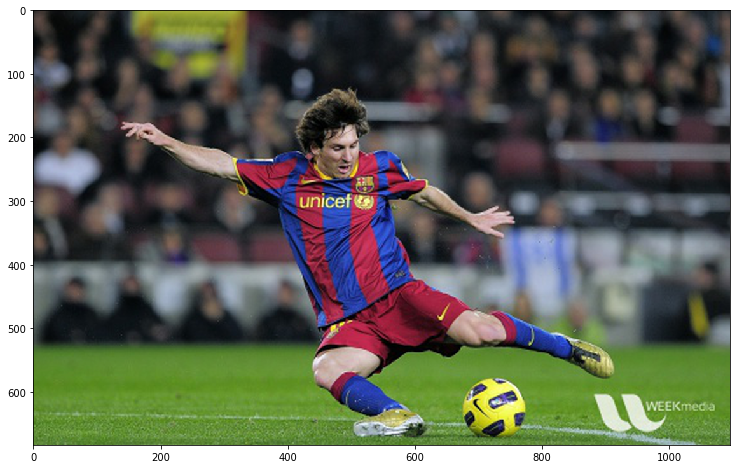

In [5]:
#Segunda alternativa

import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

rows, cols = img.shape[:2]

print("Filas:", rows, "\n")

print("Columnas:", cols, "\n")

img_new_2 = cv2.resize(img,(2*cols, 2*rows), interpolation = cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(img_new_2, cv2.COLOR_BGR2RGB))

print("Tamaño nuevo 2:", img_new_2.shape)

## 2.0 Rotar

Se definine una rotación como una transformacion tal que a cada punto P(x,y) de un objeto o figura 
le corresponder otro punto P′(x′,y′), tal que:

\begin{equation}
x'= xcos\theta − ysen\theta
\end{equation}

\begin{equation}
y'= xsen\theta + ycos\theta
\end{equation}

Usando matrices yo puedo escribir una rotación usando una matriz M:
    
\begin{equation}
M = 
\begin{bmatrix}
cos\theta & -sen\theta\\
sen\theta &  cos\theta \\
\end{bmatrix}
\end{equation}
    
\begin{equation}
\vec{P'} = 
\begin{bmatrix}
cos\theta & -sen\theta\\
sen\theta &  cos\theta \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}
\end{equation}

Tamaño: (342, 548, 3)


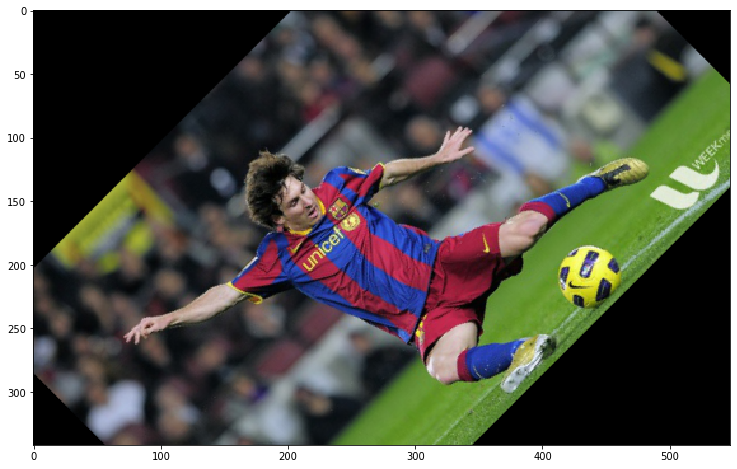

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

img = cv2.imread('data/messi5.jpg')

rows,cols = img.shape[:2]

#Matriz para rotar

M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1) #(x_centro, y_centro, angulo)

img_rot = cv2.warpAffine(img,M,(cols,rows)) #Aplica la matriz para transformar

plt.imshow(cv2.cvtColor(img_rot, cv2.COLOR_BGR2RGB))

print("Tamaño:", img_rot.shape)

## 3.0 Transformación Afín

En la transformación afín, todas las líneas paralelas en la imagen original seguirán siendo paralelas 
en la imagen de salida. Para encontrar la matriz de transformación necesitamos tres puntos de la imagen 
de entrada y sus ubicaciones correspondientes en la imagen de salida.

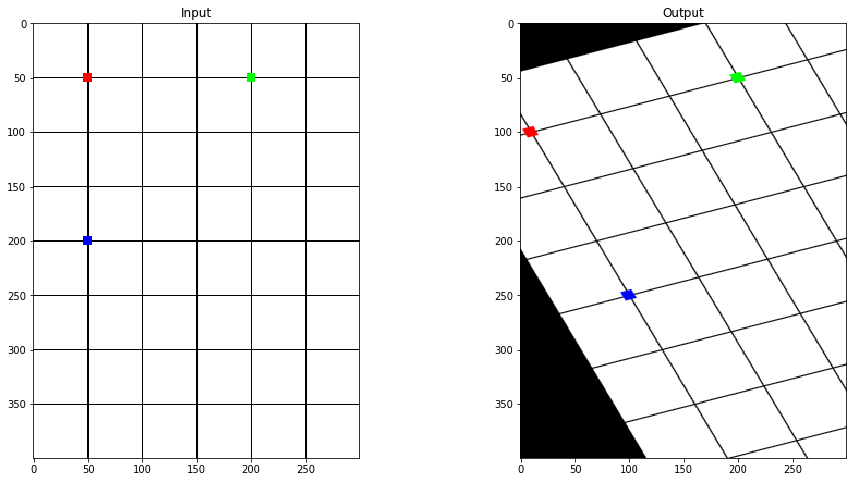

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

im_af = cv2.imread('data/drawing.png')

rows,cols,ch = im_af.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])

pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2) #Obtengo matriz de transformacion

dst = cv2.warpAffine(im_af,M,(cols,rows))

plt.subplot(121),plt.imshow(im_af),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

* OpenCV proporciona dos funciones de transformación, cv2.warpAffine y cv2.warpPerspective. La funcion cv2.warpAffine 
toma una matriz de transformación 2x3 mientras que cv2.warpPerspective toma una matriz de transformación 3x3 como 
entrada.

# 4.0 Alineación de Imágenes

En muchas aplicaciones tenemos dos imágenes de la misma escena o el mismo objeto, pero no están alineadas. 
En otras palabras, si selecciona una sección (por ejemplo una esquina) en una imagen, las coordenadas de la misma
esquina en la otra imagen son muy diferentes.

La alineación de la imagen es la técnica de deformar una imagen (o, a veces, ambas imágenes) para que 
las características de las dos imágenes se alineen perfectamente.

## 4.1 Homografía

Una homografía es una transformación que determina una correspondencia entre dos figuras geométricas planas, tal que
a cada uno de los puntos y las rectas de una de ellas le corresponden, respectivamente, un punto y una recta de la otra.

Cuando conocemos la homografía, podemos aplicarla a todos los píxeles de una imagen para obtener una imagen distorsionada
que esté alineada con la segunda imagen (https://en.wikipedia.org/wiki/Homography)


En el corazón de las técnicas de alineación de imagenes se encuentra una matriz simple de 3×3 llamada homografía que se puede escribir como:

\begin{equation}
H=     
\begin{bmatrix}
h_{00}&h_{01}&h_{02}\\
h_{10}&h_{11}&h_{12}\\
h_{20}&h_{21}&h_{22}\\
\end{bmatrix}
\end{equation} 

Considerando un set de puntos $(x_1,y_1)$ en una primera imagen y un set de puntos $(x_2,y_2)$ en una segunda imagen. 
Luego, la homografía H transforma $(x_1,y_1)$ en $(x_2,y_2)$ de la siguiente forma:
    
\begin{equation}
\begin{bmatrix}
x_2 \\
y_2 \\
1   \\
\end{bmatrix}=    
\begin{bmatrix}
h_{00}&h_{01}&h_{02}\\
h_{10}&h_{11}&h_{12}\\
h_{20}&h_{21}&h_{22}\\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
y_1 \\
1   \\
\end{bmatrix}
\end{equation} 


## 4.2 Homografías con OpenCV

Un muy buen blog (en inglés) para aprender OpenCV https://www.learnopencv.com. Los códigos de este blog pueden
descargarse de aquí https://github.com/spmallick/learnopencv
    
Los siguientes ejercicios están tomados de la siguiente entrada https://www.learnopencv.com/homography-examples-using-opencv-python-c/

## 4.2.1 Alinear Usando Homografía sin Detección Automática de Puntos

## * Ejemplo 1

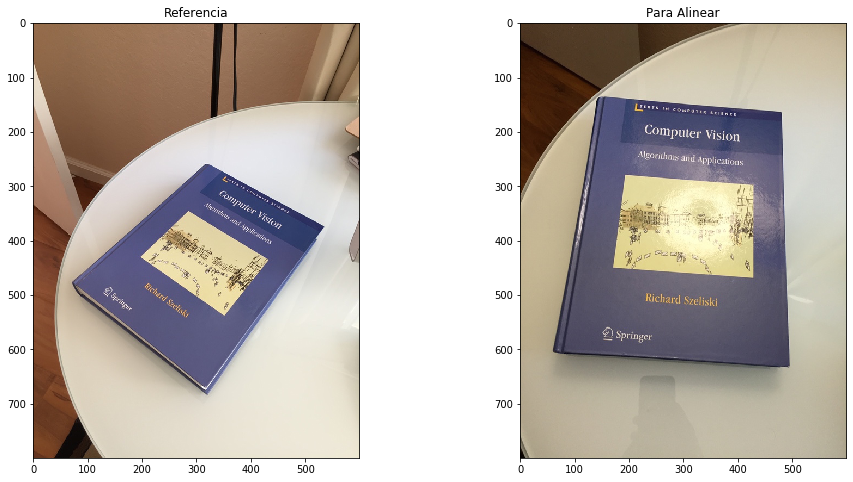

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Leyendo imagen de referencia

im_ref = cv2.imread('data/book1.jpg')

#Abriendo la imagen que queremos alinear

im_src = cv2.imread('data/book2.jpg')

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

plt.close("all")
plt.figure()
ax = plt.subplot("121")
ax.set_title("Referencia")
ax.imshow(cv2.cvtColor(im_ref, cv2.COLOR_BGR2RGB))

ax = plt.subplot("122")
ax.set_title("Para Alinear")
ax.imshow(cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB))



In [9]:
#Creando un arreglo con cuatro esquinas de la imagen de referencia
pts_ref = np.array([[318, 256],[534, 372],[316, 670],[73, 473]])

#Creando un arreglo con cuatro esquinas de la imagen que nos interesa alinear

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]])
 
# Calculando Homography
h, status = cv2.findHomography(pts_src, pts_ref) #h es la homografía

# Determinando numero de filas y de columnas
print("Tamaño:", im_src.shape, "\n")
rows,cols = im_src.shape[:2]

print("Filas:", rows, "\n")

print("Columnas:", cols, "\n")
    
# Transformando la imagen homography
im_out = cv2.warpPerspective(im_src, h, (cols,rows))
     

Tamaño: (800, 600, 3) 

Filas: 800 

Columnas: 600 



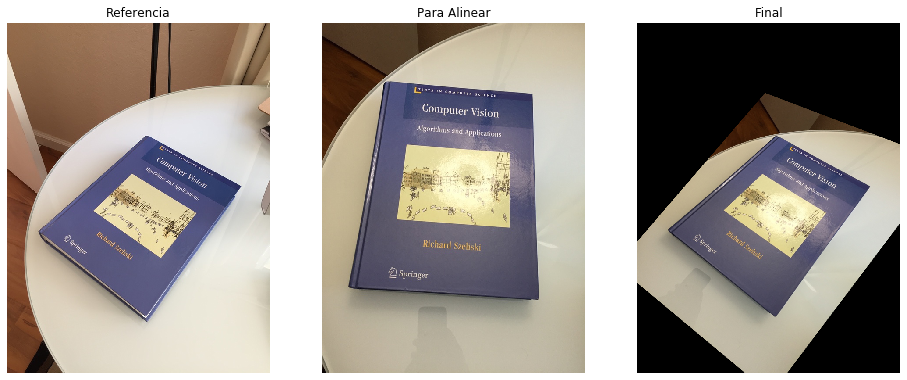

<Figure size 1152x576 with 0 Axes>

In [10]:
# Desplegando las imágenes
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

plt.close("all")
plt.figure()
ax = plt.subplot("131")
ax.imshow(cv2.cvtColor(im_ref, cv2.COLOR_BGR2RGB))
ax.set_title("Referencia")
ax.axis("off")
ax = plt.subplot("132")
ax.imshow(cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB))
ax.set_title("Para Alinear")
ax.axis("off")
ax = plt.subplot("133")
ax.imshow(cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB))
ax.set_title("Final")
ax.axis("off")
plt.show()
plt.clf() 

In [11]:
import cv2
import numpy as np
import sys

Ahora veamos un ejemplo en donde podemos seleccionar los puntos.

## * Ejemplo 2

Tenemos un anuncio:

Tamaño: (477, 600, 3)


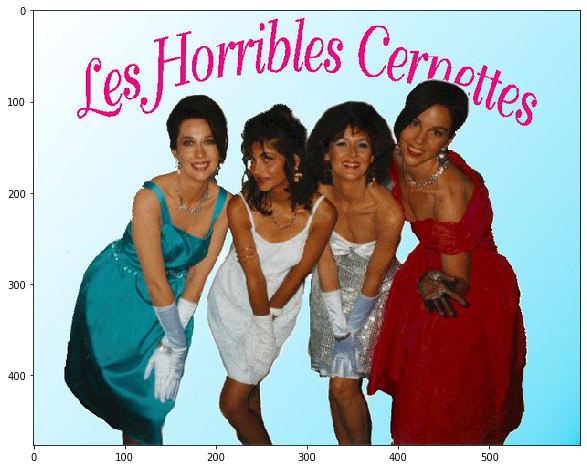

In [12]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

#Tenemos este anuncio
im_src = cv2.imread('data/first-image.jpg');
size = im_src.shape;

print("Tamaño:", im_src.shape)
plt.imshow(cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB))
plt.show();

Y una imagen de una calle llena de otros anuncios (Times Square). Lo que queremos hacer es reemplazar un anuncio de la imagen 
de Times Square por la imagen de arriba.

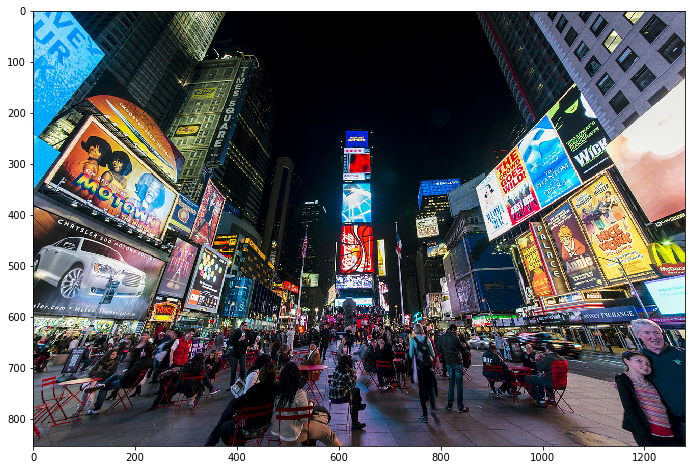

In [13]:
# Leer imagen de destino
im_dst = cv2.imread('data/times-square.jpg');
plt.imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB))
plt.show();

In [14]:
#Definimos una funcion para seleccionar los puntos manualmente

def mouse_handler(event, x, y, flags, data) :
    if event == cv2.EVENT_LBUTTONDOWN :
        cv2.circle(data['im'], (x,y),3, (0,0,255), 5, 16);
        cv2.imshow("Image", data['im']);
        if len(data['points']) < 4 :
            data['points'].append([x,y])

def get_four_points(im):
    # Set up data to send to mouse handler
    data = {}
    data['im'] = im.copy()
    data['points'] = []
    
    #Set the callback function for any mouse event
    cv2.imshow("Image",im)
    cv2.setMouseCallback("Image", mouse_handler, data)
    cv2.waitKey(0)
    
    # Convert array to np.array
    points = np.vstack(data['points']).astype(float)
    
    return points

In [15]:
# El tamaño del anuncio era que queremos 'pegar' en la imagen grande es
print("Tamaño:", im_src.shape)

#Ahora definimos un vector con las esquinas de la imagen que queremos 'pegar'

pts_src = np.array([[0, 0], [599, 0], [599, 476],[0, 476]], dtype=float);
pts_src

Tamaño: (477, 600, 3)


array([[  0.,   0.],
       [599.,   0.],
       [599., 476.],
       [  0., 476.]])

In [16]:
# Leer imagen de destino
im_dst = cv2.imread('data/times-square.jpg');

# Obtener las esquinas del anuncio manualmente
print ('Click sobre 4 esquinas de un anuncio y luego presiona enter')
pts_dst = get_four_points(im_dst)
    

Click sobre 4 esquinas de un anuncio y luego presiona enter


In [17]:
# Calcular la homografía entre la fuente y los puntos de destino
h, status = cv2.findHomography(pts_src, pts_dst);
    
# Aplicar la homografía
im_temp = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))

# Black out polygonal area in destination image.
cv2.fillConvexPoly(im_dst, pts_dst.astype(int), 0, 16);
    
# Anadir el anuncio a la imagen de destino
im_dst_new = im_dst + im_temp;

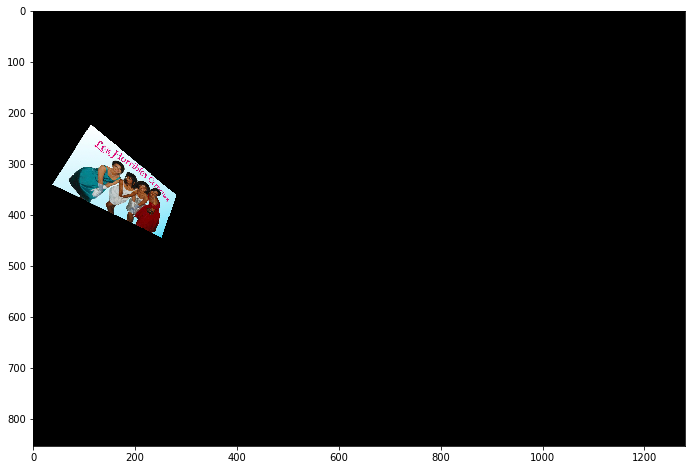

In [18]:
### Deplegando la imagen temporal
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter
plt.imshow(cv2.cvtColor(im_temp, cv2.COLOR_BGR2RGB))
plt.show()

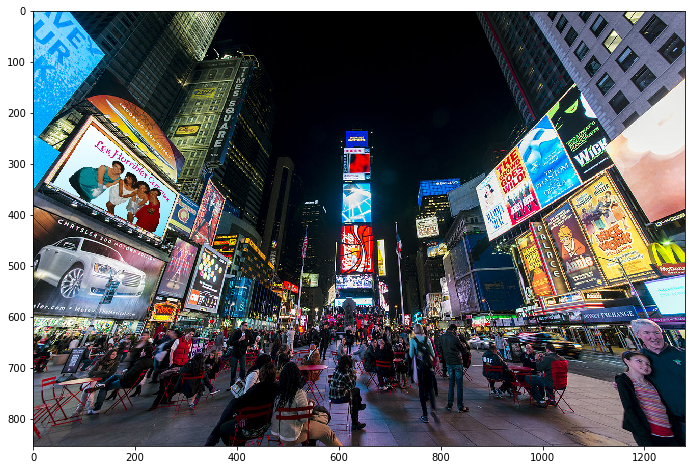

In [19]:
#Desplegando la imagen final
plt.imshow(cv2.cvtColor(im_dst_new, cv2.COLOR_BGR2RGB))
plt.show()

## 4.2.2 Alinear Usando Homografía con Detección Automática de Puntos

Reading reference image :  data/form.jpg


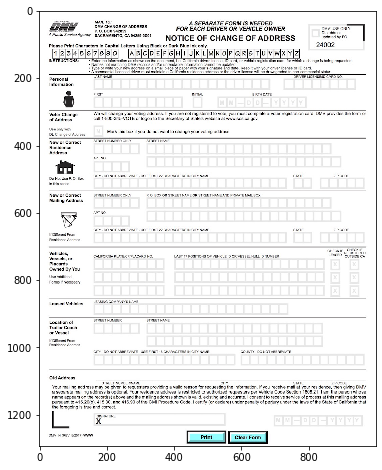

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as  plt

# Leer imagen de referencia
refFilename = "data/form.jpg"
print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(imReference, cv2.COLOR_BGR2RGB))

Reading image to align :  data/scanned-form.jpg


Text(0.5, 1.0, 'Formulario Escaneado')

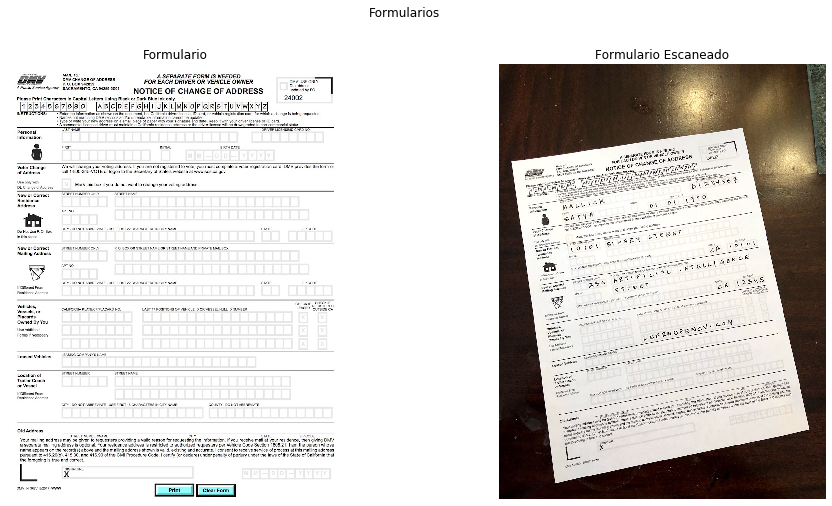

In [21]:
# Leer imagen para alinear
imFilename = "data/scanned-form.jpg"
print("Reading image to align : ", imFilename);  
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

#Desplegando imagenes
plt.close("all")
plt.figure()
plt.suptitle("Formularios")
ax = plt.subplot("121")
ax.axis("off")
ax.imshow(cv2.cvtColor(imReference, cv2.COLOR_BGR2RGB))
ax.set_title("Formulario")

ax = plt.subplot("122")
ax.axis("off")
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
ax.set_title("Formulario Escaneado")


In [22]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15 #15%
 
def alignImages(im1, im2):
    # Convierto la imagen a escala de grises
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
   
    # Detectamos ORB puntos claves y determinamos su caracteristicas
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
   
    # Hacemos match
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)
   
    # Ordenamos los matchs por score
    matches.sort(key=lambda x: x.distance, reverse=False)
 
    # Removemos algunos matchs
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    print('Numero de Correspondencias:', numGoodMatches)
    matches = matches[:numGoodMatches]
 
    # Dibujamos los matchs
    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)
    
    # Extraemos los puntos de los buenos matchs
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt
   
    # Encontramos la homografia
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
    # Usamos la homografia
    height, width, channels = im2.shape
    im1Reg = cv2.warpPerspective(im1, h, (width, height))
   
    return im1Reg, h
   

In [23]:
print("Alineando imágenes\n")
#La imagen alineada es guardada en imReg. 
#La homografia es guardada en h. 
imReg, h = alignImages(im, imReference)
   
# Guardar imagen alineada
outFilename = "data/aligned.jpg"
print("Guardando la imagen alineada:", outFilename, '\n'); 
cv2.imwrite(outFilename, imReg)
 
# Imprimir homografia para inspeccionar
print("Homografía:\n",  h)

Alineando imágenes

Numero de Correspondencias: 75
Guardando la imagen alineada: data/aligned.jpg 

Homografía:
 [[ 1.41100293e+00 -2.01062621e-01 -9.93007398e+00]
 [ 2.25479216e-01  1.53572829e+00 -4.87050660e+02]
 [-5.76255282e-05  1.41012389e-04  1.00000000e+00]]


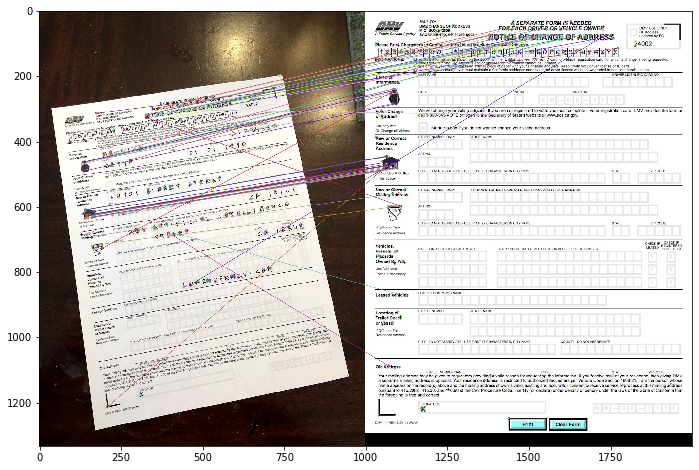

In [24]:
#Desplegando imagen con las correspondencias
im_matches = cv2.imread('matches.jpg');
plt.imshow(cv2.cvtColor(im_matches, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Formulario Scaneado Alineado')

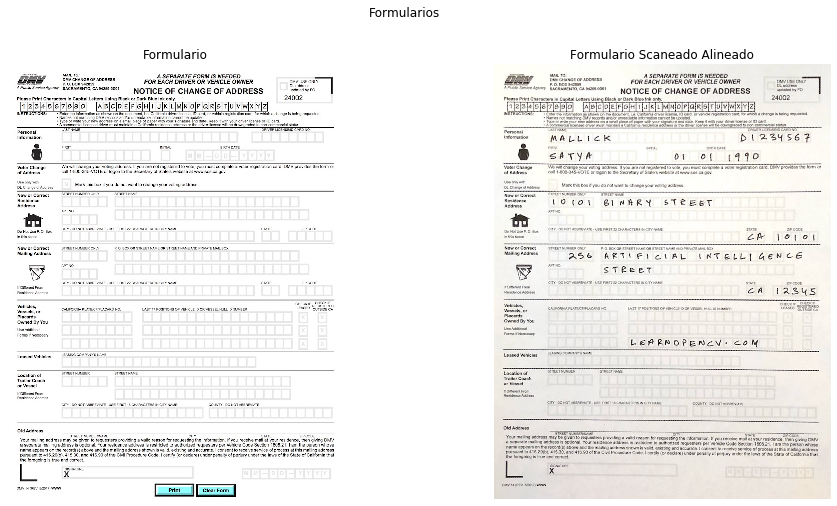

In [25]:
#Desplegando el resultado
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter
plt.close("all")
plt.figure()
plt.suptitle("Formularios")
ax = plt.subplot("121")
ax.axis("off")
ax.imshow(cv2.cvtColor(imReference, cv2.COLOR_BGR2RGB))
ax.set_title("Formulario")

ax = plt.subplot("122")
ax.axis("off")
ax.imshow(cv2.cvtColor(imReg, cv2.COLOR_BGR2RGB))
ax.set_title("Formulario Scaneado Alineado")

# 4.2.3 Alineamiento de Imágenes con Maximizacion de Coeficientes de Correlacion

El algoritmo de alineación de imagen ECC introducido en OpenCV 3 se basa en el paper titulado
Alineación de imagen paramétrica utilizando la maximización del coeficiente de correlación mejorado, de
Georgios D. Evangelidis y Emmanouil Z. Psarakis. El algoritmo utiliza una nueva medida de similitud 
llamada Coeficiente de Correlación Mejorado (ECC) para estimar los parámetros del modelo.

(-0.5, 1381.5, 613.5, -0.5)

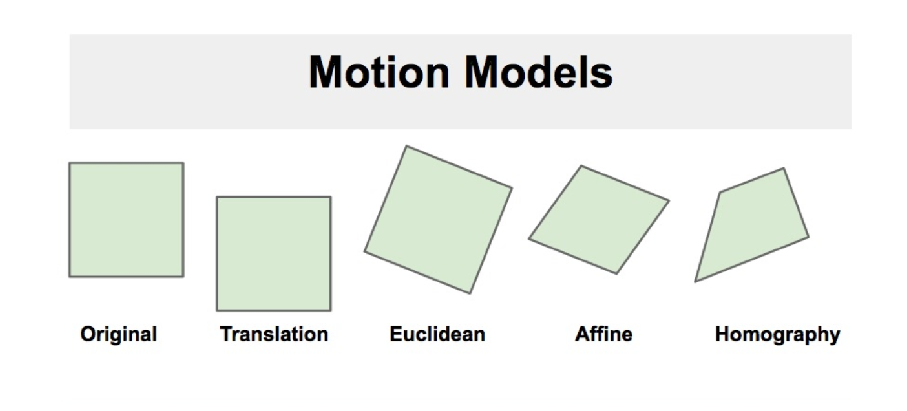

In [26]:
from PIL import Image
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

image = Image.open('data/Motion_Models.png')

plt.imshow(image)
plt.axis('off')

- MOTION_TRANSLATION: La primera imagen se puede desplazar en $x, y$ para obtener 
la segunda imagen. Solo hay dos parámetros que necesitamos estimar, una para el desplazamiento en la dirección de $x$
y otro para la dirección de $y$.

- MOTION_EUCLIDEAN: La primera imagen es una versión girada y desplazada de la segunda imagen. Hay tres parámetros 
para estimar, el desplazamiento en la dirección $x$, el desplazamiento en la dirección $y$ y  el ángulo de rotación. 
Cuando un cuadrado sufre una transformación euclidiana, el tamaño no cambia, las líneas paralelas permanecen paralelas y los ángulos 
rectos no cambian después de la transformación.

- MOTION_AFFINE: Una transformada afín es una combinación de rotación, traslación (desplazamiento), escala y corte. 
Esta transformación tiene seis parámetros para determinar. Cuando un cuadrado experimenta una transformación afín, 
las líneas paralelas permanecen paralelas, pero las líneas perpendiculares despues de la transformacíon ya no lo serán

- MOTION_HOMOGRAPHY: Todas las transformaciones descritas anteriormente son transformaciones 2D. No tienen en cuenta 
los efectos 3D. Una transformación de homografía, por otro lado, puede explicar algunos efectos 3D (pero no todos). 
Esta transformación tiene 8 parámetros. Un cuadrado cuando se transforma usando una homografía se puede transformar en 
cualquier cuadrilátero.

(-0.5, 999.5, 728.5, -0.5)

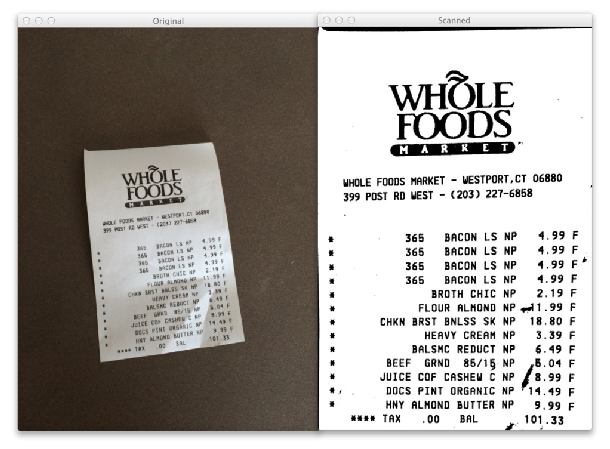

In [27]:
from PIL import Image
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

image = Image.open('data/perspective.jpg')

plt.imshow(image)
plt.axis('off')

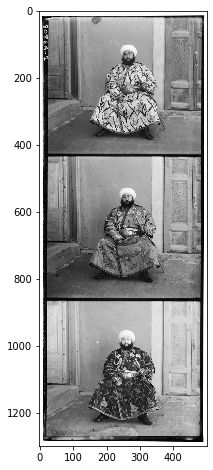

In [28]:
#Leer la imagen y desplegarla

im_emir =  cv2.imread("data/emir.jpg");

plt.imshow(cv2.cvtColor(im_emir, cv2.COLOR_BGR2RGB))
 

## 4.2.4 Pasos Previos

In [29]:
im_grey =  cv2.imread("data/emir.jpg", cv2.IMREAD_GRAYSCALE);

#Encontramos el ancho y el alto
sz = im_grey.shape
print(sz)
height = int(sz[0] / 3);
width = sz[1]
    
#Creamos un arreglo de zeros para guardar la imagen final (Ojo que la altura es la tercera parte de la imagen original )

im_color = np.zeros((height,width,3), dtype=np.uint8 )

#Creamos un arreglo para guardar la imagen alineada

im_aligned = np.zeros((height,width,3), dtype=np.uint8 )
 
im_color.shape

(1300, 500)


(433, 500, 3)

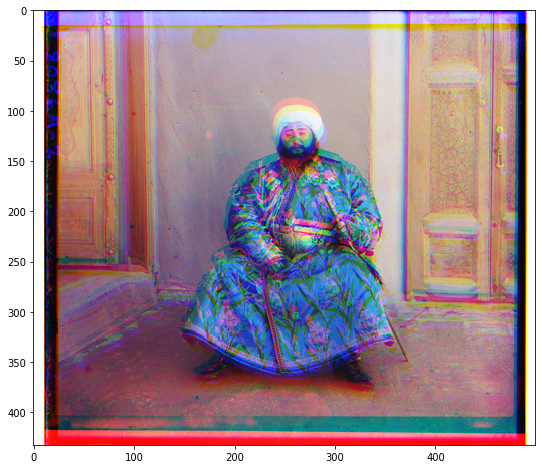

In [30]:
#Cortando la imagen en tres y creando una imagen a color
for i in range(0,3):
    im_color[:,:,i] = im_grey[i*height:(i+1) * height,:]
im_color

plt.imshow(cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB))

## 4.2.3 Primer Intento

In [31]:
#Creamos un arreglo para guardar la imagen alineada 

im_aligned = np.zeros((height,width,3), dtype=np.uint8 )

# Copiamos el canal rojo
im_aligned[:,:,2] = im_color[:,:,2]

# Definimos un modelo
warp_mode = cv2.MOTION_HOMOGRAPHY #Podemos usar otra trasnformación

# Fijamos la matriz a la identidas
if warp_mode == cv2.MOTION_HOMOGRAPHY:
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)

# Fijar el criterio para que el algoritmo pare
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)

 
# Alinear con respecto al color rojo, usamos los gradientes
for i in range(0,2):
    (cc, warp_matrix) = cv2.findTransformECC (im_color[:,:,2], im_color[:,:,i], warp_matrix, warp_mode, criteria)
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        #Use Perspective warp when the transformation is a Homography
        im_aligned[:,:,i] = cv2.warpPerspective (im_color[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
                                                 
    else:
        # Use Affine warp when the transformation is not a Homography
        im_aligned[:,:,i] = cv2.warpAffine(im_color[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
     


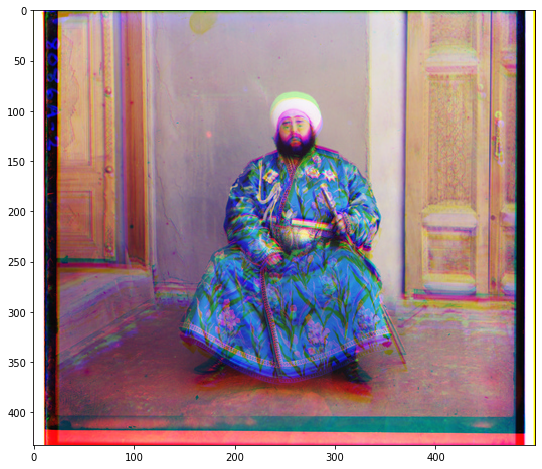

In [32]:
plt.imshow(cv2.cvtColor(im_aligned, cv2.COLOR_BGR2RGB))

## 4.2.4 Segundo Intento

In [33]:
#Definimos una funcion gradiente
def get_gradient(im) :
    # Calculate the x and y gradients using Sobel operator
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

In [34]:
#Creamos un arreglo para guardar los gradientes

im_color_grad = np.zeros((height,width,3), dtype=np.uint8 )

for i in range(0,3):
    im_color_grad[:,:,i]=get_gradient(im_color[:,:,i])


In [35]:
# Vamos a alinear
# El azul y el verde seran alineados al canal rojo
# Copiamos el canal rojo

im_aligned_2 = np.zeros((height,width,3), dtype=np.uint8 )
im_aligned_2[:,:,2] = im_color[:,:,2]
 
# Definimos un modelo
warp_mode = cv2.MOTION_HOMOGRAPHY #Podemos usar otra trasnformación
 
# Fijamos la matriz a la identidas
if warp_mode == cv2.MOTION_HOMOGRAPHY:
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)

# Fijar el criterio para que el algoritmo pare
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)

# Alinear con respecto al color rojo, usamos los gradientes
for i in range(0,2):
    (cc, warp_matrix) = cv2.findTransformECC (im_color_grad[:,:,2], im_color_grad[:,:,i], warp_matrix, warp_mode, criteria)
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        #Use Perspective warp when the transformation is a Homography
        im_aligned_2[:,:,i] = cv2.warpPerspective (im_color[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else:
        # Use Affine warp when the transformation is not a Homography
        im_aligned_2[:,:,i] = cv2.warpAffine(im_color[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
     


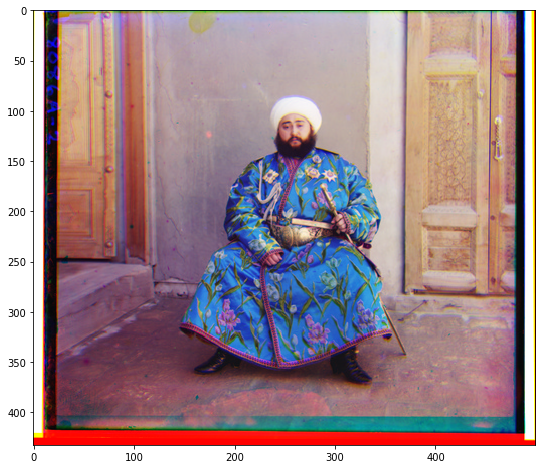

In [36]:
plt.imshow(cv2.cvtColor(im_aligned_2, cv2.COLOR_BGR2RGB))